# <span style="color: blue;">Projeto de Business Analytics - Modelo de melhor consumo de diesel
## <span style="color: blue;">Base de dados de 24 mil viagens em 2 anos, de 80 veículos
## <span style="color: blue;">Objetivo:
### <span style="color: blue;">Criar um modelo de Machine Learning que propoe a melhor média de consumo de diesel considerando os valores de velocidade e peso da carga
#### O modelo proposto poderá ser utilizado:
- Realtime na torre de controle
- Software mobile na tela do motorista


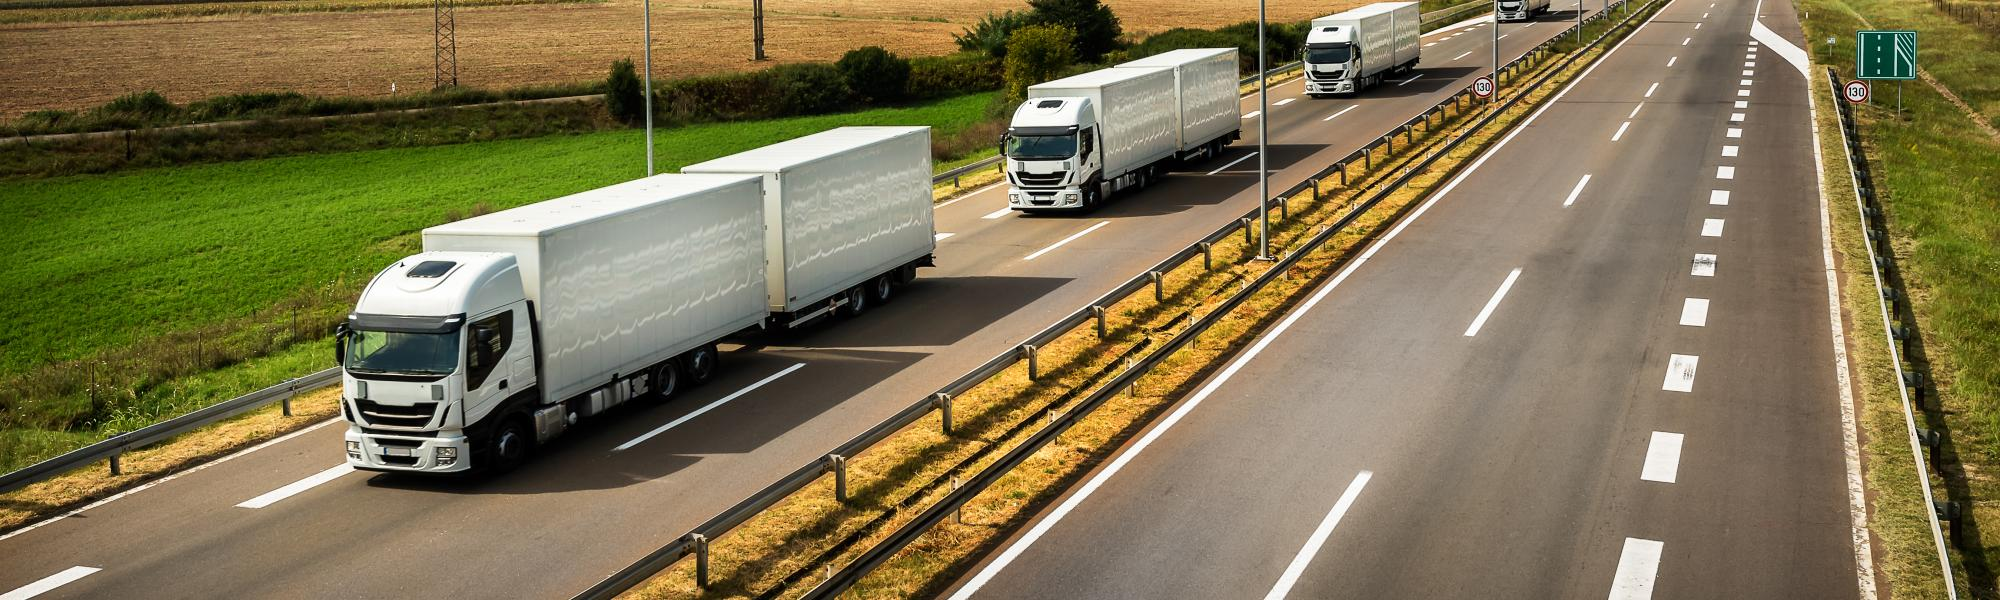

In [1]:
from IPython.display import Image
Image('dados/truck.jpg')

In [2]:
# Imports

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Estatística
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Machine learning 
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

# importar os módulos de sistema
import math
import sys, os

# Modulos especiais para tratamento de dados
sys.path.append(os.path.abspath(os.path.join('00')))
from estrategia1 import *
from estrategia2 import *
from estrategia3 import *

Author: Data Science Academy

seaborn    : 0.12.2
matplotlib : 3.7.1
numpy      : 1.23.5
statsmodels: 0.14.0
sklearn    : 1.1.0
scipy      : 1.10.0
sys        : 3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]
pandas     : 1.5.3



## Análise Exploratória

In [3]:
# importar Dataset
df = pd.read_csv('dados/dataset_viagens.csv')

In [4]:
df.shape

(24000, 8)

In [5]:
df.sample(10)

,media,litros,km_rodado,vel_media,vel_subida,carga_ton,veiculo,marca
15077,2.207091,286.095549,631.439014,89.081432,61.467618,27.843295,51,VOLVO
3231,2.217414,307.461666,681.769941,91.090418,63.723568,27.242276,11,MAN
21952,2.131229,351.022196,748.108681,89.451557,67.209636,28.173900,74,MERCEDES
14936,2.102895,287.753922,605.116426,93.459202,66.384887,28.254759,50,VOLVO
882,2.082762,323.522154,673.819641,89.640599,67.493563,28.963579,3,MAN
951,2.112424,284.672676,601.349313,93.020423,62.513568,27.771475,4,MAN
21726,2.179574,298.657233,650.945535,90.266073,64.259972,27.944041,73,MERCEDES
17389,2.276857,305.451273,695.468749,88.232890,63.998515,27.102370,58,VOLVO
7433,2.240007,269.404362,603.467740,88.541196,63.331281,27.327555,25,SCANIA
19894,2.017635,223.684959,451.314693,90.990539,64.802013,27.054024,67,MERCEDES


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   media       24000 non-null  float64
 1   litros      24000 non-null  float64
 2   km_rodado   24000 non-null  float64
 3   vel_media   24000 non-null  float64
 4   vel_subida  24000 non-null  float64
 5   carga_ton   24000 non-null  float64
 6   veiculo     24000 non-null  int64  
 7   marca       24000 non-null  object 
dtypes: float64(6), int64(1), object(1)
memory usage: 1.5+ MB


In [7]:
df['veiculo'].value_counts()

1     300
2     300
59    300
58    300
57    300
     ... 
26    300
25    300
24    300
23    300
80    300
Name: veiculo, Length: 80, dtype: int64

In [8]:
df['marca'].unique()

array(['MAN', 'SCANIA', 'VOLVO', 'MERCEDES'], dtype=object)

In [9]:
df.iloc[:, 0:6].describe()

,media,litros,km_rodado,vel_media,vel_subida,carga_ton
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,2.169761,287.105049,623.230110,89.483180,65.244609,27.342345
std,0.064179,32.942533,76.080245,2.352556,2.130054,0.647758
min,1.941368,154.520849,328.169146,80.233652,57.080639,24.427267
25%,2.126662,265.122377,572.656323,87.888258,63.813991,26.905499
50%,2.169714,287.058477,622.801212,89.498667,65.241763,27.338229
75%,2.213182,309.321115,674.748297,91.057715,66.690163,27.780884
max,2.415269,414.738677,946.682260,99.993277,73.634177,29.797052


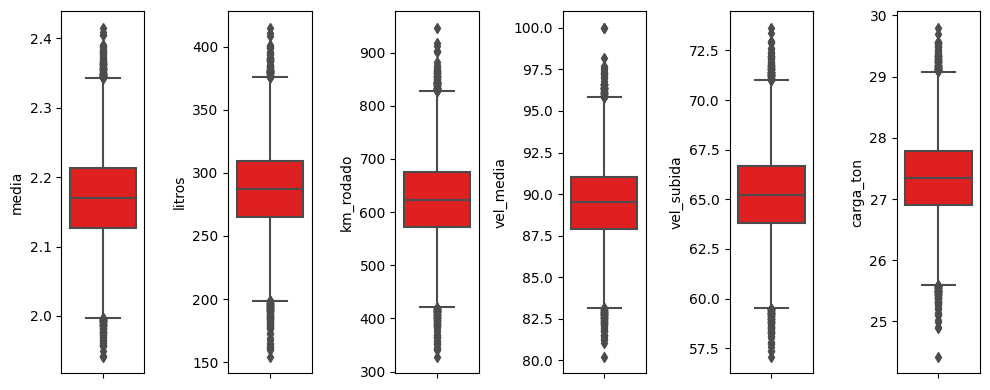

In [10]:
# Boxplots em colunas numéricas
features = df.columns[0:6]
plt.figure(figsize = (10, 4))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y = df[features[i]], color = 'red', orient = 'v')
    plt.tight_layout()

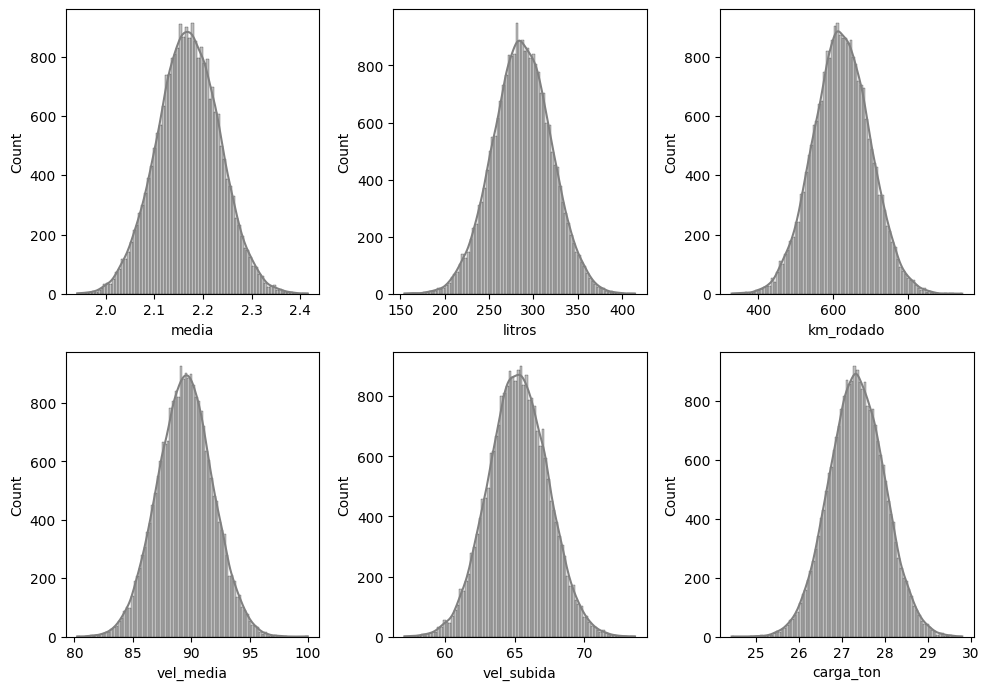

In [11]:
# Histogramas em colunas numéricas
features = df.columns[0:6]
plt.figure(figsize = (10, 10))
for i in range(len(features)):
    plt.subplot(3, len(features)//2, i+1)
    sns.histplot(x=df[features[i]], kde=True, color='grey')
    plt.xlabel(features[i])
plt.tight_layout()

In [12]:
# teste de checagem de distribuições normais
features = df.columns[0:6]
for i in features:
    
    # Calcula a normalidade
    stats, pval = normaltest(df[i])
    
     # Checar p-valor
    if pval > 0.05:
        print(i, ': Distribuição Normal')
    else:
        print(i, ': Distribuição Não Normal')

media : Distribuição Normal
litros : Distribuição Normal
km_rodado : Distribuição Normal
vel_media : Distribuição Normal
vel_subida : Distribuição Normal
carga_ton : Distribuição Normal


In [13]:
# Correlação variáveis numéricas
df[df.columns[0:6]].corr()

,media,litros,km_rodado,vel_media,vel_subida,carga_ton
media,1.000000,0.132810,0.366723,-0.446720,-0.434566,-0.394531
litros,0.132810,1.000000,0.970377,0.113875,0.113664,0.107312
km_rodado,0.366723,0.970377,1.000000,-0.000922,0.001514,0.005310
vel_media,-0.446720,0.113875,-0.000922,1.000000,0.004902,0.000622
vel_subida,-0.434566,0.113664,0.001514,0.004902,1.000000,0.003366
carga_ton,-0.394531,0.107312,0.005310,0.000622,0.003366,1.000000


<Figure size 1500x1500 with 0 Axes>

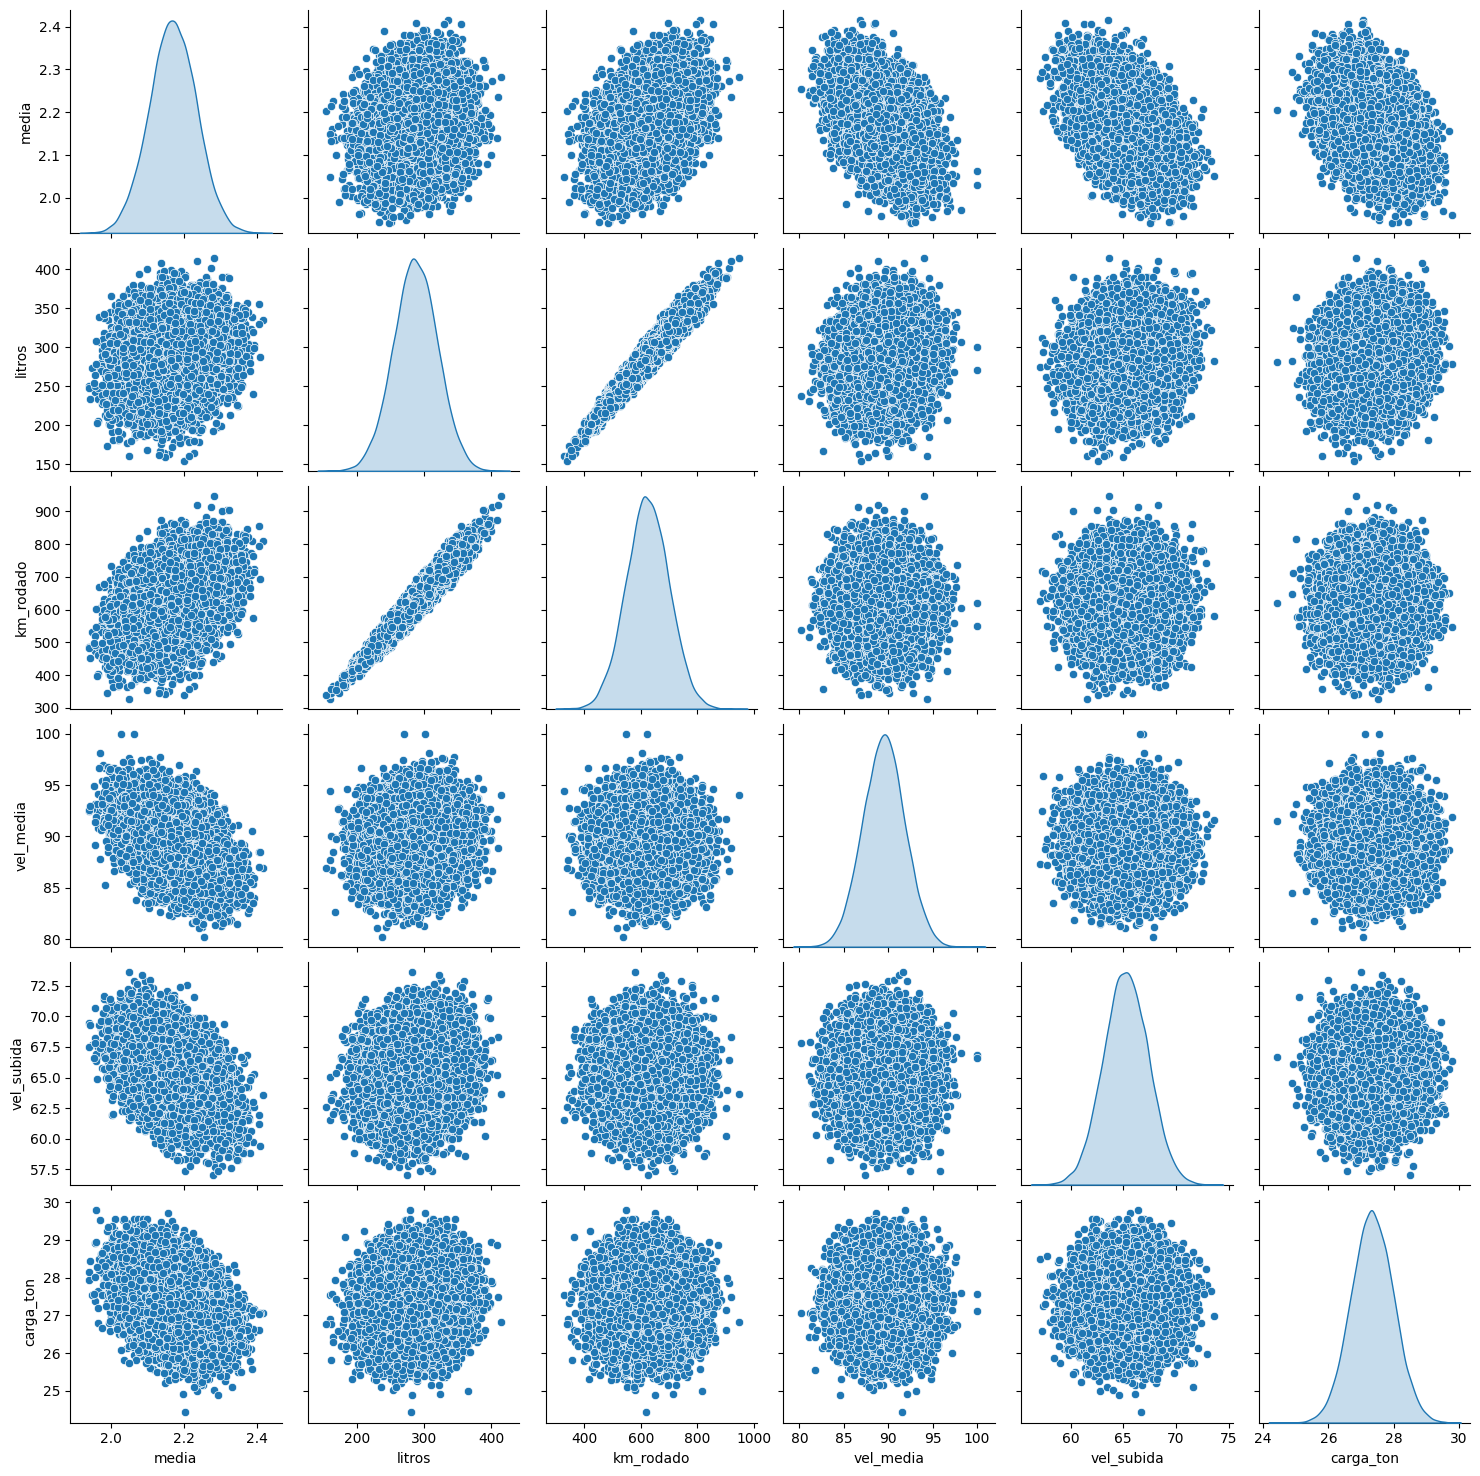

In [14]:
# Heatmap Correlação variáveis numéricas
plt.figure(figsize = (15, 15))
sns.pairplot(df[df.columns[0:6]], diag_kind = 'kde');

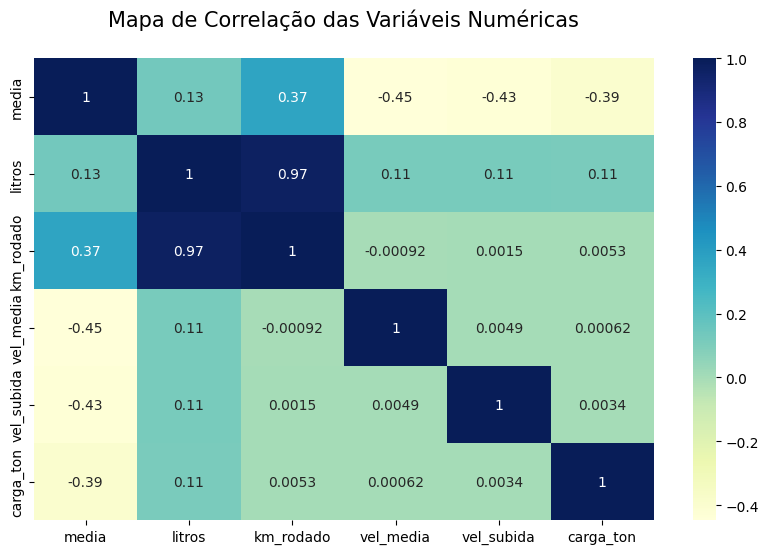

In [15]:
# Mapa Correlação variáveis numéricas
plt.figure(figsize = (10,6))
sns.heatmap(df[df.columns[0:6]].corr(), annot = True, cmap = 'YlGnBu')
plt.title('Mapa de Correlação das Variáveis Numéricas\n', fontsize = 15)
plt.show()

In [16]:
# Quantidade de veiculos por marca
contagem_viagens = df.groupby('veiculo')['marca'].value_counts().reset_index(name='contagem')
qtd_veiculos = contagem_viagens.groupby('marca')['veiculo'].count().reset_index(name='contagem')
qtd_veiculos

,marca,contagem
0,MAN,20
1,MERCEDES,20
2,SCANIA,20
3,VOLVO,20


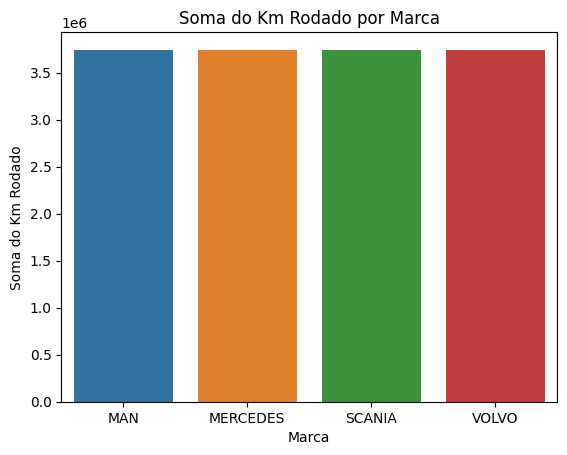

In [17]:
# Calcular a soma dos valores da coluna 'km_rodado' por categoria 'marca'
sum_km_by_marca = df.groupby('marca')['km_rodado'].sum().reset_index()

# Criar o gráfico de colunas usando Seaborn
sns.barplot(x='marca', y='km_rodado', data=sum_km_by_marca)

# Personalizar o gráfico
plt.xlabel('Marca')
plt.ylabel('Soma do Km Rodado')
plt.title('Soma do Km Rodado por Marca')

# Exibir o gráfico
plt.show()

### Média de Consumo por marca

In [18]:
# Media por marca
media_marca = df.groupby('marca')[['km_rodado', 'litros']].sum()
media_marca['media'] = media_marca['km_rodado'] / media_marca['litros']
media_marca['media'].reset_index(name='media')

,marca,media
0,MAN,2.170970
1,MERCEDES,2.170954
2,SCANIA,2.170191
3,VOLVO,2.170839


## Parecer Preliminar
Quanto aos dados:
- Sem valores ausentes, com boa qualidade da coleta
- Valores numéricos em forma normal, que facilita o algorítimo de ML
- Classes categóricas (marcas) com quase nenhuma influência na variabilidade das médias
- Multicolinearidade das varáveis km_rodado e litros, onde prejudica a criação do modelo

Construção do modelo:

- Descartar variáveis veículo, marca e litros
- Desenvolver estatísticas e testes importância de variáveis
- Descartar mais variáveis se for o caso
- Modelo de regressão linear
- Variável target será a variável 'media'

## Desenvolvimento do Modelo com Machine Learning

### Análise Estatística das Variáveis Numéricas

In [19]:
## Iniciando o trabalho de Pré-Processamento
df.head()

,media,litros,km_rodado,vel_media,vel_subida,carga_ton,veiculo,marca
0,2.220274,264.008943,586.172175,89.826761,63.861335,26.350307,1,MAN
1,2.209800,290.141181,641.154113,85.789898,63.602235,27.644138,1,MAN
2,2.187988,300.917045,658.402911,90.595038,64.725530,28.586152,1,MAN
3,2.191131,303.879953,665.840888,91.881064,64.572720,27.932324,1,MAN
4,2.114683,242.721605,513.279250,90.030461,65.096283,28.266891,1,MAN


In [20]:
# coletando x e y
x = df[['km_rodado', 'vel_media', 'vel_subida', 'carga_ton']]
y = df['media'].values

In [21]:
# variáveis explicativas
x.sample(5)

,km_rodado,vel_media,vel_subida,carga_ton
22917,608.095769,83.942412,67.148114,27.912818
13448,385.273313,91.971782,65.276982,27.028505
20807,637.942735,85.178575,66.438771,27.376596
10178,613.818479,89.237796,64.660891,27.686576
14593,616.151590,85.962873,67.258925,26.700529


In [22]:
# variável target
y

array([2.22027394, 2.20980045, 2.18798809, ..., 2.16354798, 2.19657309,
       2.11571022])

In [23]:
# treinando modelo para dados estatísticos
xc = sm.add_constant(x)
modelo = sm.OLS(y, xc)
modelo_v1 = modelo.fit()

In [24]:
# estatísitcas do treino
modelo_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                 1.257e+04
Date:                Thu, 13 Jul 2023   Prob (F-statistic):               0.00
Time:                        20:23:36   Log-Likelihood:                 45414.
No. Observations:               24000   AIC:                        -9.082e+04
Df Residuals:                   23995   BIC:                        -9.078e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9775      0.015    325.833      0.000       4.948       5.007
km_rodado      0.0003   3.09e-06    100.591      0.000       0.000       0.000
vel_media     -0.0121      0.000   -121.021      0.000      -0.012      -0.012
vel_subida    -0.0130      0.000   -117.641      0.000      -0.013      -0.013
carga_ton     -0.0391      0.000   -107.595      0.000      -0.040      -0.038
==============================================================================
Omnibus:                        1.196   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.550   Jarque-Bera (JB):                1.173
Skew:                           0.014   Prob(JB):                        0.556
Kurtosis:                       3.021   Cond. No.                     4.14e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Parecer das estatísticas
- R-quadrado de praticamente 0.677 indica boa explicabilidade das variáveis em relação à espessura da parede da garrafa
- O ideal seria próximo de 0.9 a 1.0, então, precisaríamos encontrar mais variáveis explicativas
- O P-valor, tanto geral quanto individual indica que as variáveis, apesar de baixo, ainda sim ajuda explicar a média de consumo
- Não descartar nenhuma variável para treinar modelo de Machine Learning. Todas serão importantes.

### Treinar modelo com sklearn

In [25]:
# Divisão em dados de treino e de teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2)

In [26]:
# Cria o modelo de Machine Learning
modelo_sk = LinearRegression(normalize = False, fit_intercept = True)

In [27]:
# Treina o modelo
modelo_v2 = modelo_sk.fit(x_treino, y_treino)

In [28]:
modelo_v2

LinearRegression(normalize=False)

In [29]:
# Confirmando R2 do modelo
r2_score(y_teste, modelo_v2.fit(x_treino, y_treino).predict(x_teste))

0.6800369908497446

In [30]:
# imprimindo o intercepto do modelo (B0)
print("Intercepto:", modelo_v2.intercept_)

Intercepto: 4.974847745189465


In [31]:
# imprimindo os coeficiente do modelo (B1, B2, B3 e B4)
print("Coeficientes:", modelo_v2.coef_)

Coeficientes: [ 0.00031113 -0.01218518 -0.01297006 -0.03885867]


In [32]:
# Imprimindo os coeficientes e as variáveis
for coef, var in sorted(zip(map(abs, modelo_v2.coef_), df.columns[1:5]), reverse = True):
    print ("%1f %s" % (coef,var))

0.038859 vel_subida
0.012970 vel_media
0.012185 km_rodado
0.000311 litros


In [33]:
df.sample(5)

,media,litros,km_rodado,vel_media,vel_subida,carga_ton,veiculo,marca
19563,2.227549,339.386823,756.000808,90.520009,64.790103,27.322775,66,MERCEDES
15960,2.122128,278.781132,591.609156,89.287539,61.439545,28.360252,54,VOLVO
8334,2.134372,167.490320,357.486709,82.621719,62.269252,27.925865,28,SCANIA
12214,2.168041,325.563743,705.835388,89.858651,67.674958,27.542191,41,VOLVO
18600,2.199125,240.376899,528.618939,89.486230,60.837563,26.786680,63,MERCEDES


In [34]:
# Simular uma provável consumo média com os valores abaixo

KM_RODADO = 600
VEL_MEDIA = 80
VEL_SUBIDA = 60
CARGA_TON = 26

# Lista com os valores das variáveis
dados_var = [KM_RODADO, VEL_MEDIA, VEL_SUBIDA, CARGA_TON]

# Reshape
xp = np.array(dados_var).reshape(1, -1)

# Previsão
print("\n")
print("__________________DASHBOARD__________________\n\n")
print("Previsão de KM Rodado:", KM_RODADO)
print("\n")
print("Velocidade Média:", VEL_MEDIA)
print("\n")
print("Velocidade de Subida:", VEL_SUBIDA)
print("\n")
print("Carga em Ton:", CARGA_TON)
print("\n")
print("Media:", round(list(modelo_v2.predict(xp))[0],3))
print("\n")



__________________DASHBOARD__________________


Previsão de KM Rodado: 600


Velocidade Média: 80


Velocidade de Subida: 60


Carga em Ton: 26


Media: 2.398




In [35]:
# Simulação de economia mensal considerando 24 meses de dados e média geral a 2,17 e custo do diesel a R$ 5,00
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
economia_litros = (df['km_rodado'].sum() / 2.17) - (df['km_rodado'].sum() / modelo_v2.predict(xp))
economia_litros = round(economia_litros[0], 3)
economia_reais = round(economia_litros * 5, 2) / 24
economia_reais_formatado = locale.currency(economia_reais, grouping=True, symbol='R$')
print("\n")
print('Economia de:', economia_reais_formatado, 'Mensais')



Economia de: R$ 136.632,71 Mensais


## Parecer Final
- Reafirmamos objetivo principal que é prever valores de consumo através da média
- Os valores dos coeficientes e intercepto são os valores do modelo a ser utilizado, independente da finalidade, se é visualização em dashboard ou software automatizado
- Claro que, conforme explicado no parecer das estatísticas, esse modelo necessita de mais variáveis para explicar melhor a variação da média

## <span style="color: blue;">FIM